# <a id='toc1_'></a>[<span style="color:yellow;">Harmonic Series</span>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<span style="color:yellow;">Harmonic Series</span>](#toc1_)    
- [Step 1: Import Required Libraries](#toc2_)    
  - [Step 1.1: Import core libraries](#toc2_1_)    
  - [Step 1.2: Import functions from 😊 our 😊 module](#toc2_2_)    
  - [Step 1.3: Configure plotting](#toc2_3_)    
- [Step 2: Harmonic Series](#toc3_)    
  - [Step 2.1: Use predefined note frequencies](#toc3_1_)    
  - [Step 2.2: Signal parameters](#toc3_2_)    
  - [Step 2.3: 🫠 Harmonic synthesis equation 🫠](#toc3_3_)    
  - [Step 2.4: Verify harmonic structure](#toc3_4_)    
    - [Step 2.4.1: Harmonics amplitude](#toc3_4_1_)    
    - [Step 2.4.2: Varification Report](#toc3_4_2_)    
    - [Step 2.4.3: Signal checks](#toc3_4_3_)    
  - [Step 2.5: Time signal and frequency spectrum](#toc3_5_)    
- [Step 3: Time-Frequency Analysis & Playback of Common Notes](#toc4_)    
  - [Step 3.1: Analyze and play individual notes](#toc4_1_)    
  - [Step 3.2: Combined sequence playback](#toc4_2_)    
  - [Step 3.3: Key Observations](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Step 1: Import Required Libraries](#toc0_)

## <a id='toc2_1_'></a>[Step 1.1: Import core libraries](#toc0_)

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from IPython.display import Audio

## <a id='toc2_2_'></a>[Step 1.2: Import functions from 😊 our 😊 module](#toc0_)
1. Delete __pycache__
2. Restart the kernel

In [157]:
from audio_visualization import *
print(MODULE_VERSION)  # Should show "10.0" if the latest module is loaded

10.0


## <a id='toc2_3_'></a>[Step 1.3: Configure plotting](#toc0_)

In [158]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")

# <a id='toc3_'></a>[Step 2: Harmonic Series](#toc0_)

<div style=text-align:center>
    <img src=Image/Harmonic.svg width=250>
</div>

- A natural sequence of frequencies where each is an integer multiple of a "fundamental" frequency 
    - (e.g., 1×, 2×, 3× the base frequency).

- Occurs in most sounds (`instruments`, `voices`) 
    - the `fundamental` is loudest, 
    - higher harmonics are weaker.

- Determines "`timbre`" (why a `piano` vs. `violin` playing the same note sound different).
<div style=text-align:center;>
    <img src=Image/Piano_vs_Violin.jpeg width=300>
</div>

- Follows a fixed pattern: 
    - 1st harmonic = fundamental, 
    - 2nd = 2× fundamental, 
    - 3rd = 3×, etc.

## <a id='toc3_1_'></a>[Step 2.1: Use predefined note frequencies](#toc0_)

In [159]:
# Select notes from our predefined STANDARD_NOTES constant
notes_of_interest = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5']
notes = {note: STANDARD_NOTES[note] for note in notes_of_interest}

# Display frequencies
for note, freq in notes.items():
    print(f"{note}: {freq:.2f} Hz")

C4: 261.63 Hz
D4: 293.66 Hz
E4: 329.63 Hz
F4: 349.23 Hz
G4: 392.00 Hz
A4: 440.00 Hz
B4: 493.88 Hz
C5: 523.25 Hz
D5: 587.33 Hz


## <a id='toc3_2_'></a>[Step 2.2: Signal parameters](#toc0_)

In [160]:
duration = 2  # Note duration in seconds
t = np.linspace(0, duration, int(DEFAULT_SAMPLE_RATE * duration), endpoint=False)

# Use module function to create time segment (new in v2.1)
time_segment = create_time_segment(t, end_time=0.1)  # 0-0.1s segment
print(f"Time segment defined: 0 to 0.1 seconds ({len(time_segment)} samples)")

Time segment defined: 0 to 0.1 seconds (4411 samples)


## <a id='toc3_3_'></a>[Step 2.3: 🫠 Harmonic synthesis equation 🫠](#toc0_)

The simplified formula for generating a musical note with harmonics is:

$$ s(t) = A \cdot \sin(2\pi f_0 t) + \sum_{i=2}^{5} \left[ \frac{A \cdot h}{i^3} \cdot \sin \left(2\pi \cdot i \cdot f_0 t\right) \right], $$

where:  
- $s(t)$ = Sound wave amplitude at time $t$  
- $A$ = Amplitude of the fundamental frequency  
- $f_0$ = Fundamental frequency (base note frequency in Hz)  
- $h$ = Harmonic strength (0.3 in our code)  
- $i$ = Harmonic multiple (2 to 5 in our implementation)  
- $\sum_{i=2}^{5}$ = Summation of harmonics from the 2nd to 5th order  

This formula combines:  
1. A dominant `fundamental frequency` component ($f_0$)  
2. Weaker `harmonic components` ($i·f_0$), at integer multiples of $f_0$
    - with amplitudes decreasing rapidly as $\frac{1}{i^3}$ to mimic natural acoustic behavior

## <a id='toc3_4_'></a>[Step 2.4: Verify harmonic structure](#toc0_)

In [161]:
note_signals = {
    note: generate_note(freq, t, harmonic_strength=0.3)  # Uses the equation from Step 2.2
    for note, freq in notes.items()
}

test_note = 'C4'
test_signal = note_signals[test_note]
fundamental_freq = notes[test_note]

# Compute FFT
n = len(test_signal)
yf = fft(test_signal)
xf = fftfreq(n, 1/DEFAULT_SAMPLE_RATE)[:n//2]
yf_mag = 2.0/n * np.abs(yf[:n//2])

# Measure harmonics using module function
amplitudes = {
    f"{i}x harmonic": get_peak_amplitude(xf, yf_mag, fundamental_freq * i)
    for i in range(1, 6)
}

### <a id='toc3_4_1_'></a>[Step 2.4.1: Harmonics amplitude](#toc0_)

In [162]:
fundamental_amp = amplitudes["1x harmonic"]
print(f"\nHarmonic analysis for {test_note} ({fundamental_freq:.1f} Hz):")
print(f"Fundamental (1x) amplitude: {fundamental_amp:.4f}")
for i in range(2, 6):
    harm_amp = amplitudes[f"{i}x harmonic"]
    rel_strength = (harm_amp / fundamental_amp) * 100 if fundamental_amp > 0 else 0
    print(f"{i}x harmonic: {harm_amp:.4f} ({rel_strength:.1f}% of fundamental)")


Harmonic analysis for C4 (261.6 Hz):
Fundamental (1x) amplitude: 0.6249
2x harmonic: 0.1391 (22.3% of fundamental)
3x harmonic: 0.0968 (15.5% of fundamental)
4x harmonic: 0.0001 (0.0% of fundamental)
5x harmonic: 0.0001 (0.0% of fundamental)


### <a id='toc3_4_2_'></a>[Step 2.4.2: Varification Report](#toc0_)

In [163]:
print("\nHarmonic validation:")
if fundamental_amp == 0:
    print("⚠️  Error: Fundamental not detected")
else:
    issues = [f"{i}x harmonic too strong ({(amplitudes[f'{i}x harmonic']/fundamental_amp)*100:.1f}%)"
              for i in range(2, 6) if (amplitudes[f"{i}x harmonic"]/fundamental_amp)*100 > 20]
    print("✅ All harmonics within range" if not issues else "⚠️ Issues:\n" + "\n".join(issues))


Harmonic validation:
⚠️ Issues:
2x harmonic too strong (22.3%)


### <a id='toc3_4_3_'></a>[Step 2.4.3: Signal checks](#toc0_)

In [164]:
print(f"\nSignal validation:")
print(f"Duration: {len(test_signal)/DEFAULT_SAMPLE_RATE:.2f}s (matches {duration}s)")
print(f"Peak amplitude: {np.max(np.abs(test_signal)):.4f} (normalized)")
print(f"RMS amplitude: {np.sqrt(np.mean(test_signal**2)):.4f}")


Signal validation:
Duration: 2.00s (matches 2s)
Peak amplitude: 0.7986 (normalized)
RMS amplitude: 0.5221


## <a id='toc3_5_'></a>[Step 2.5: Time signal and frequency spectrum](#toc0_)

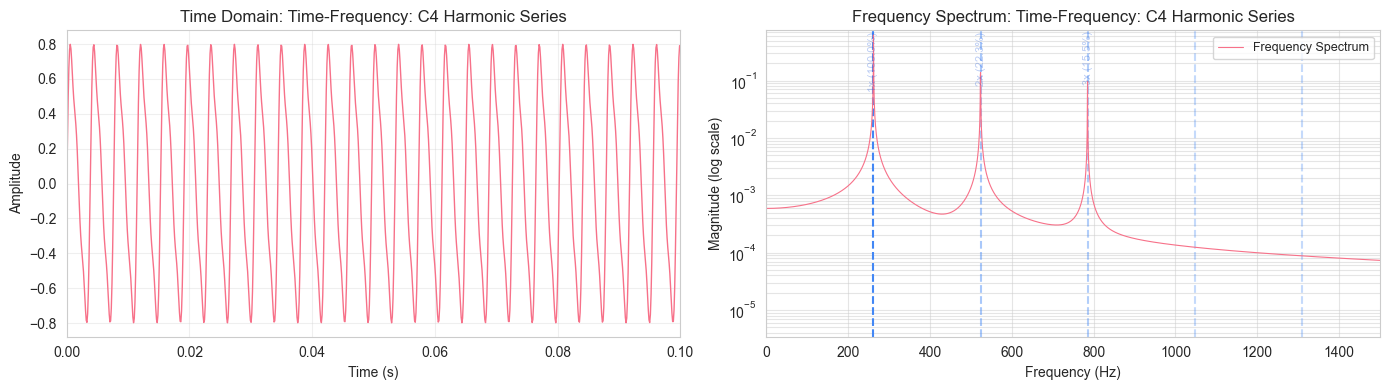

In [165]:
# Use the test note (C4) 
# to demonstrate simultaneous domains
test_note = 'C4'
test_signal = note_signals[test_note]
fundamental_freq = notes[test_note]

# Use module function with only supported parameters
detected_freq = plot_signal_and_fft(
    signal=test_signal,
    t=t,
    time_segment=time_segment,
    sample_rate=DEFAULT_SAMPLE_RATE,
    title=f"Time-Frequency: {test_note} Harmonic Series",
    fundamental_freq=fundamental_freq,
    xlim=(0, 1500),  # Focus on lower harmonics
    downsample=5
    # Removed 'highlight_harmonics' since it's not supported
)

In [166]:
print(f"Interpretation for {test_note}:")
print(f"- Time domain: Periodic waveform with ~{int(fundamental_freq * 0.1)} cycles in 0.1s (matching {fundamental_freq:.1f} Hz)")
print(f"- Frequency domain: Clear peaks at {test_note} (1x) and its harmonics (2x to 5x)")
print(f"- Harmonics decrease in strength with higher multiples (consistent with our synthesis equation)")
print(f"- Module function detected fundamental: {detected_freq:.2f} Hz (matches expected {fundamental_freq:.2f} Hz)")

Interpretation for C4:
- Time domain: Periodic waveform with ~26 cycles in 0.1s (matching 261.6 Hz)
- Frequency domain: Clear peaks at C4 (1x) and its harmonics (2x to 5x)
- Harmonics decrease in strength with higher multiples (consistent with our synthesis equation)
- Module function detected fundamental: 261.50 Hz (matches expected 261.63 Hz)


# <a id='toc4_'></a>[Step 3: Time-Frequency Analysis & Playback of Common Notes](#toc0_)
This section combines visual analysis (time/frequency domains) with audio playback for key notes, connecting their acoustic properties to how they sound.

## <a id='toc4_1_'></a>[Step 3.1: Analyze and play individual notes](#toc0_)


--- Analyzing C4 ---


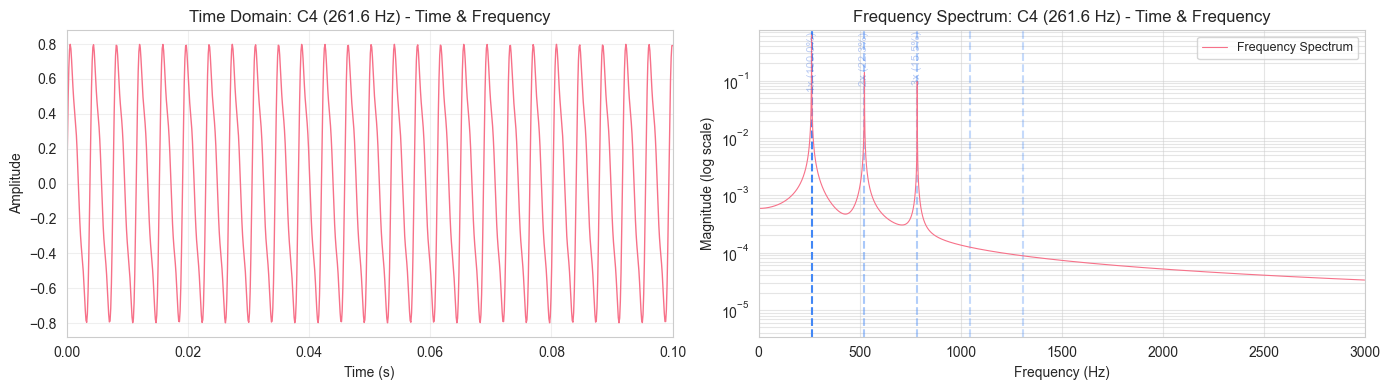


Play C4:


Frequency Check: Detected = 261.50 Hz | Expected = 261.63 Hz (100.0% match)

--- Analyzing D4 ---


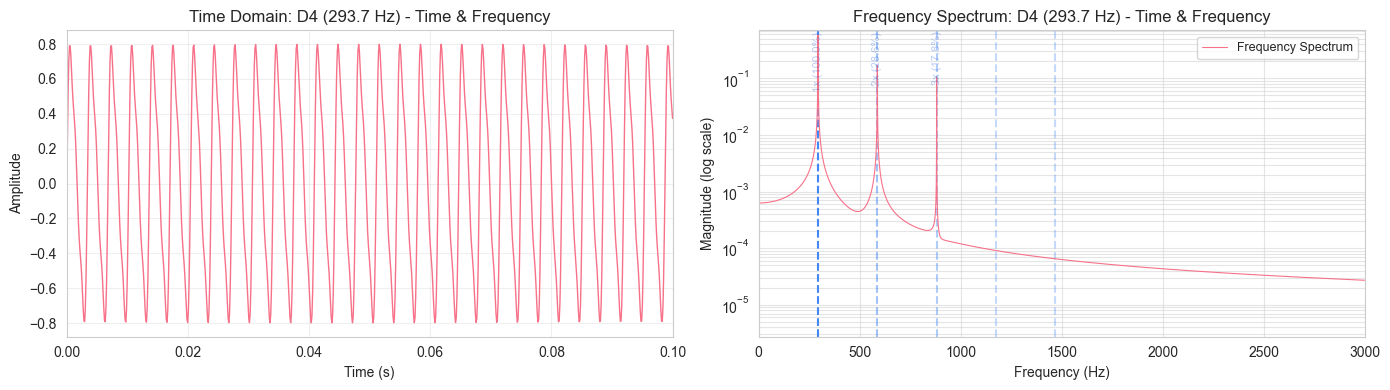


Play D4:


Frequency Check: Detected = 293.50 Hz | Expected = 293.66 Hz (99.9% match)

--- Analyzing E4 ---


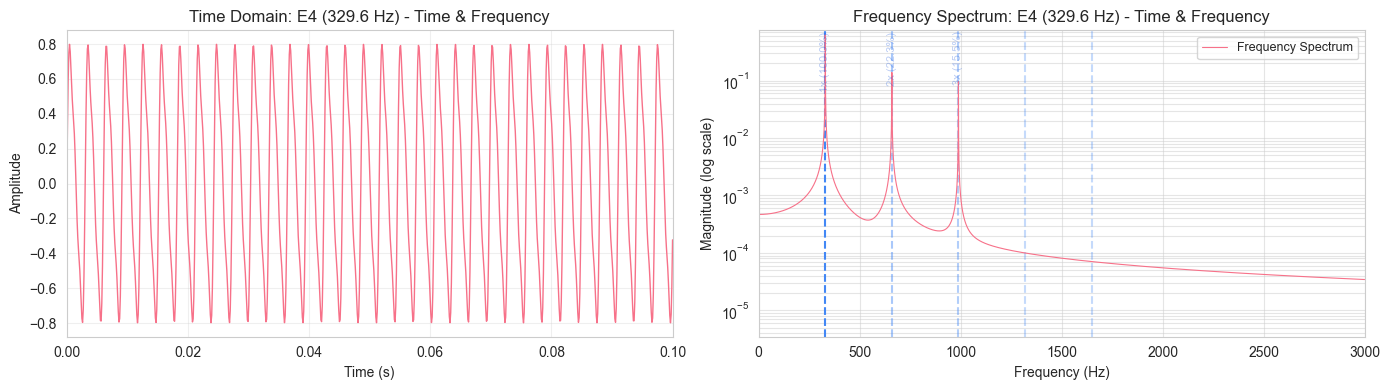


Play E4:


Frequency Check: Detected = 329.50 Hz | Expected = 329.63 Hz (100.0% match)

--- Analyzing A4 ---


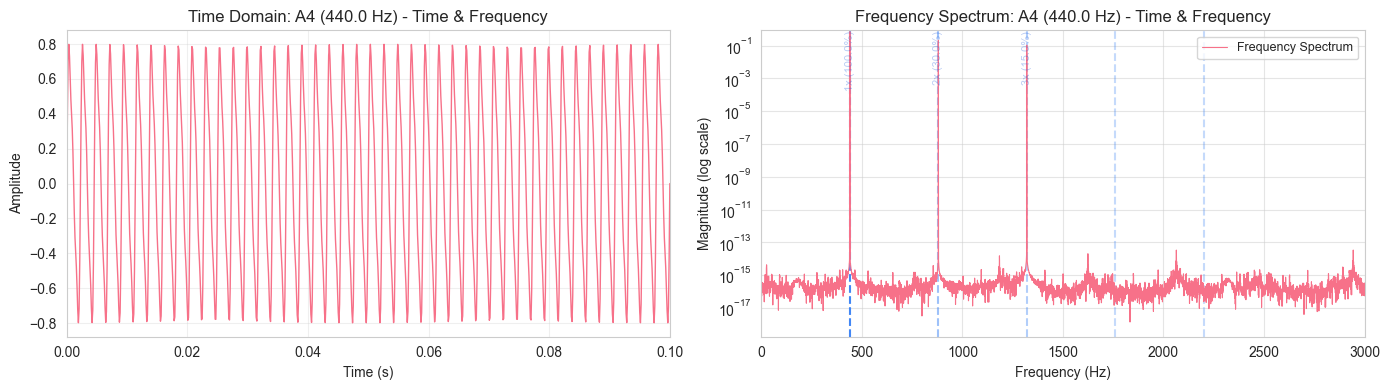


Play A4:


Frequency Check: Detected = 440.00 Hz | Expected = 440.00 Hz (100.0% match)

--- Analyzing C5 ---


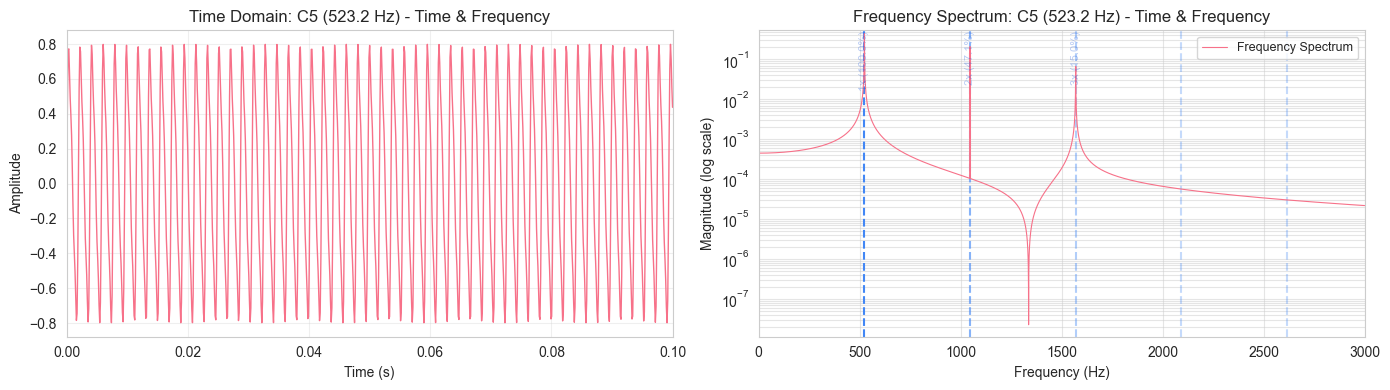


Play C5:


Frequency Check: Detected = 523.00 Hz | Expected = 523.25 Hz (100.0% match)

--- Analyzing D5 ---


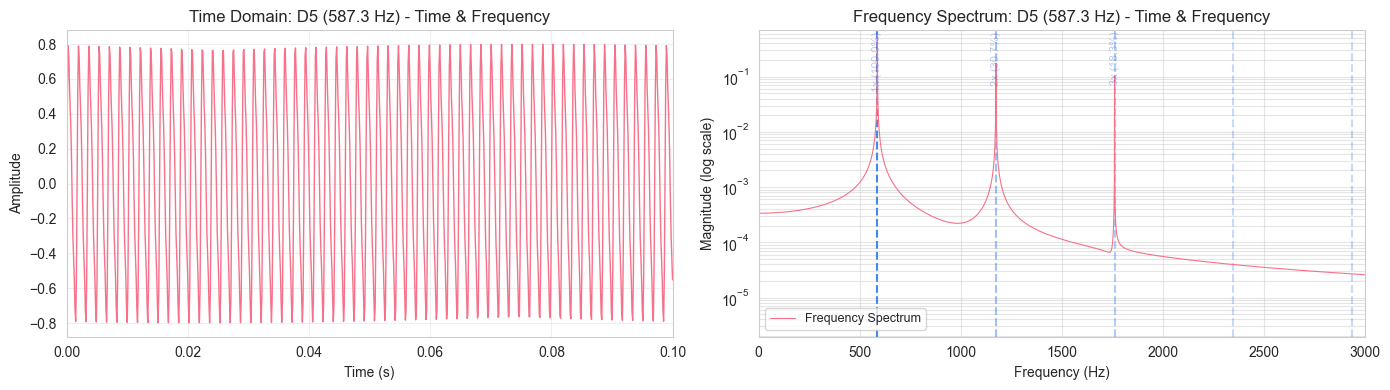


Play D5:


Frequency Check: Detected = 587.50 Hz | Expected = 587.33 Hz (100.0% match)


In [167]:
# Select representative notes across the range
notes_to_analyze = ['C4', 'D4', 'E4', 'A4', 'C5', 'D5']
dominant_frequencies = {}
individual_signals = []  # To store signals for combined playback later

for note in notes_to_analyze:
    print(f"\n--- Analyzing {note} ---")
    fundamental_freq = notes[note]
    signal = note_signals[note]
    individual_signals.append(signal)  # Save for combined sequence
    
    # Visualize time and frequency domains
    detected_freq = plot_signal_and_fft(
        signal=signal,
        t=t,
        time_segment=time_segment,
        sample_rate=DEFAULT_SAMPLE_RATE,
        title=f"{note} ({fundamental_freq:.1f} Hz) - Time & Frequency",
        fundamental_freq=fundamental_freq,
        xlim=(0, 3000),
        downsample=5
    )
    
    # Add audio playback for the note
    print(f"\nPlay {note}:")
    display(Audio(signal, rate=DEFAULT_SAMPLE_RATE))
    
    # Validate frequency detection
    dominant_frequencies[note] = detected_freq
    accuracy = 100 - abs(detected_freq - fundamental_freq)/fundamental_freq*100
    print(f"Frequency Check: Detected = {detected_freq:.2f} Hz | Expected = {fundamental_freq:.2f} Hz ({accuracy:.1f}% match)")

## <a id='toc4_2_'></a>[Step 3.2: Combined sequence playback](#toc0_)
Listen to the progression of notes from lowest to highest, matching their visual patterns.

In [168]:
# Combine all notes into a single sequence (C4 → D5)
combined_signal = np.concatenate(individual_signals)
print("\n--- Full Sequence Playback (C4 to D5) ---")
print("Listen for the increasing pitch, matching the higher frequencies in the visualizations:")
display(Audio(combined_signal, rate=DEFAULT_SAMPLE_RATE))


--- Full Sequence Playback (C4 to D5) ---
Listen for the increasing pitch, matching the higher frequencies in the visualizations:


## <a id='toc4_3_'></a>[Step 3.3: Key Observations](#toc0_)

In [169]:
print("### Time-Domain Insights:")
print("- Higher-pitched notes (e.g., C5, D5) have more cycles in the 0.1s time segment (faster oscillations).")
print("- Lower-pitched notes (e.g., C4, D4) have wider, slower waveforms with fewer cycles per 0.1s.")
print("- All waveforms are smooth due to blended fundamental + harmonic sine waves.")

print("\n### Frequency-Domain Insights:")
print("1. Each note shows a strong peak at its fundamental frequency (e.g., A4 = 440 Hz).")
print("2. Harmonics (2×, 3×, ..., 5× the fundamental) are visible but decrease in strength with higher multiples.")
print("3. The spacing between harmonics matches the fundamental frequency (e.g., 261.6 Hz gaps for C4).")

print("\n### Sound & Visual Connection:")
print("- Audible pitch corresponds directly to the fundamental frequency in the spectrum.")
print("- The 'brightness' of the sound (timbre) is shaped by the harmonic amplitudes (visible in the frequency plot).")
print("- The combined sequence demonstrates how increasing fundamental frequency translates to higher perceived pitch.")

### Time-Domain Insights:
- Higher-pitched notes (e.g., C5, D5) have more cycles in the 0.1s time segment (faster oscillations).
- Lower-pitched notes (e.g., C4, D4) have wider, slower waveforms with fewer cycles per 0.1s.
- All waveforms are smooth due to blended fundamental + harmonic sine waves.

### Frequency-Domain Insights:
1. Each note shows a strong peak at its fundamental frequency (e.g., A4 = 440 Hz).
2. Harmonics (2×, 3×, ..., 5× the fundamental) are visible but decrease in strength with higher multiples.
3. The spacing between harmonics matches the fundamental frequency (e.g., 261.6 Hz gaps for C4).

### Sound & Visual Connection:
- Audible pitch corresponds directly to the fundamental frequency in the spectrum.
- The 'brightness' of the sound (timbre) is shaped by the harmonic amplitudes (visible in the frequency plot).
- The combined sequence demonstrates how increasing fundamental frequency translates to higher perceived pitch.
